<a href="https://colab.research.google.com/github/syh0397/DataAnalyst_Study/blob/main/introduction_to_process_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pm4py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26099 sha256=3b0e741b1f469dffc2f07652e8e2fe79f597919cc4b8ef0cb09d7ed7b2e868d1
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
  Created wheel for stringdist: filename=StringDist-1.0.9-cp310-cp310-linux_x86_64.whl size=24953 sha256=582bb1c0a373db236aaeeb39cea8cf50c3ff046ed63d89179ac153a31b4ca5cd
  Stored in directory: /root/.cache/pip/wheels/79/25/0a/4a0c2c7af31a8b473f6e10e30312396f31ae899722600d7b99
Successfully built intervaltree stringdist


In [3]:
# data
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.util import dataframe_utils

# process mining
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery


In [4]:

# viz

from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.petri_net.util import performance_map

from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

# misc
from pm4py.objects.conversion.process_tree import converter as pt_converter

In [6]:
df = pd.read_csv('/content/sample_data/running-example (1).csv')

df = dataframe_utils.convert_timestamp_columns_in_df(df)
df = df.sort_values('time:timestamp')

log = log_converter.apply(df)

In [8]:
df.head()

,Activity,Costs,Resource,case:concept:name,case:creator,concept:name,org:resource,time:timestamp
14,register request,50,Pete,1,Fluxicon Nitro,register request,Pete,2010-12-30 10:02:00+00:00
9,register request,50,Mike,2,Fluxicon Nitro,register request,Mike,2010-12-30 10:32:00+00:00
10,check ticket,100,Mike,2,Fluxicon Nitro,check ticket,Mike,2010-12-30 11:12:00+00:00
11,examine casually,400,Sean,2,Fluxicon Nitro,examine casually,Sean,2010-12-30 13:16:00+00:00
0,register request,50,Pete,3,Fluxicon Nitro,register request,Pete,2010-12-30 13:32:00+00:00


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 14 to 36
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Activity           42 non-null     object             
 1   Costs              42 non-null     int64              
 2   Resource           42 non-null     object             
 3   case:concept:name  42 non-null     int64              
 4   case:creator       42 non-null     object             
 5   concept:name       42 non-null     object             
 6   org:resource       42 non-null     object             
 7   time:timestamp     42 non-null     datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 3.0+ KB


In [14]:
df.nunique()

# case:creator          1

Activity              8
Costs                 4
Resource              6
case:concept:name     6
case:creator          1
concept:name          8
org:resource          6
time:timestamp       41
dtype: int64

In [9]:
df.sort_values(['case:concept:name', 'time:timestamp']).reset_index(drop=True)

,Activity,Costs,Resource,case:concept:name,case:creator,concept:name,org:resource,time:timestamp
0,register request,50,Pete,1,Fluxicon Nitro,register request,Pete,2010-12-30 10:02:00+00:00
1,examine thoroughly,400,Sue,1,Fluxicon Nitro,examine thoroughly,Sue,2010-12-31 09:06:00+00:00
2,check ticket,100,Mike,1,Fluxicon Nitro,check ticket,Mike,2011-01-05 14:12:00+00:00
3,decide,200,Sara,1,Fluxicon Nitro,decide,Sara,2011-01-06 10:18:00+00:00
4,reject request,200,Pete,1,Fluxicon Nitro,reject request,Pete,2011-01-07 13:24:00+00:00
5,register request,50,Mike,2,Fluxicon Nitro,register request,Mike,2010-12-30 10:32:00+00:00
6,check ticket,100,Mike,2,Fluxicon Nitro,check ticket,Mike,2010-12-30 11:12:00+00:00
7,examine casually,400,Sean,2,Fluxicon Nitro,examine casually,Sean,2010-12-30 13:16:00+00:00
8,decide,200,Sara,2,Fluxicon Nitro,decide,Sara,2011-01-05 10:22:00+00:00
9,pay compensation,200,Ellen,2,Fluxicon Nitro,pay compensation,Ellen,2011-01-08 11:05:00+00:00


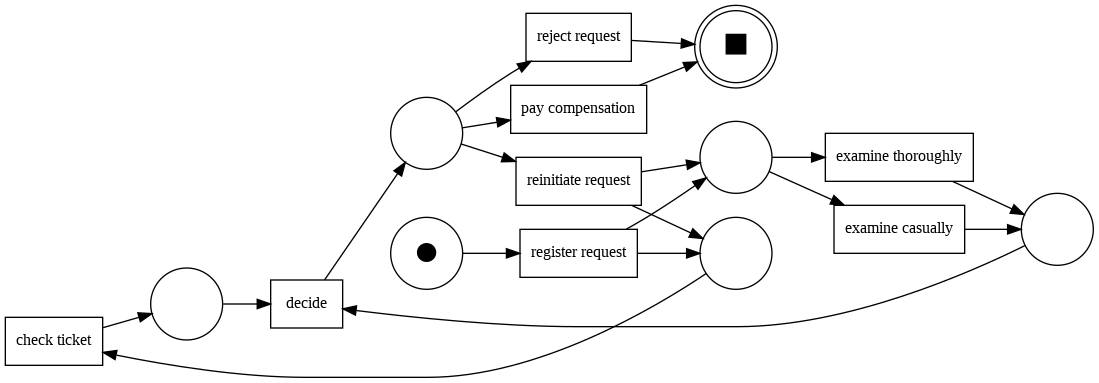

In [10]:
# alpha miner
net, initial_marking, final_marking = alpha_miner.apply(log)

# viz
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

In [11]:
# add information about frequency to the viz
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking,
                           parameters=parameters,
                           variant=pn_visualizer.Variants.FREQUENCY,
                           log=log)

# save the Petri net
pn_visualizer.save(gviz, "alpha_miner_petri_net.png")

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

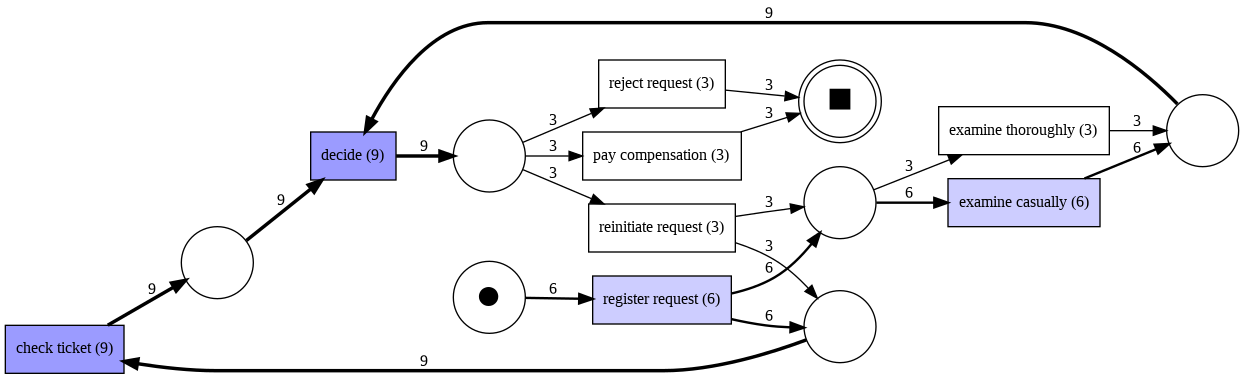

In [12]:
pn_visualizer.view(gviz)

# Directly-Follows Graph

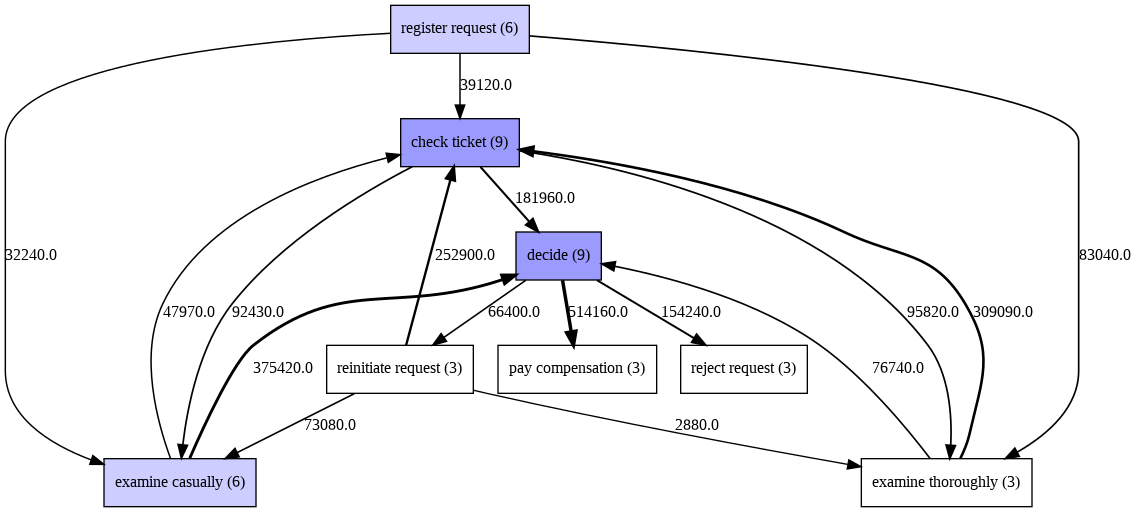

In [15]:
# creatig the graph from log
dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)
# viz
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)


# viz
dfg_visualization.view(gviz)


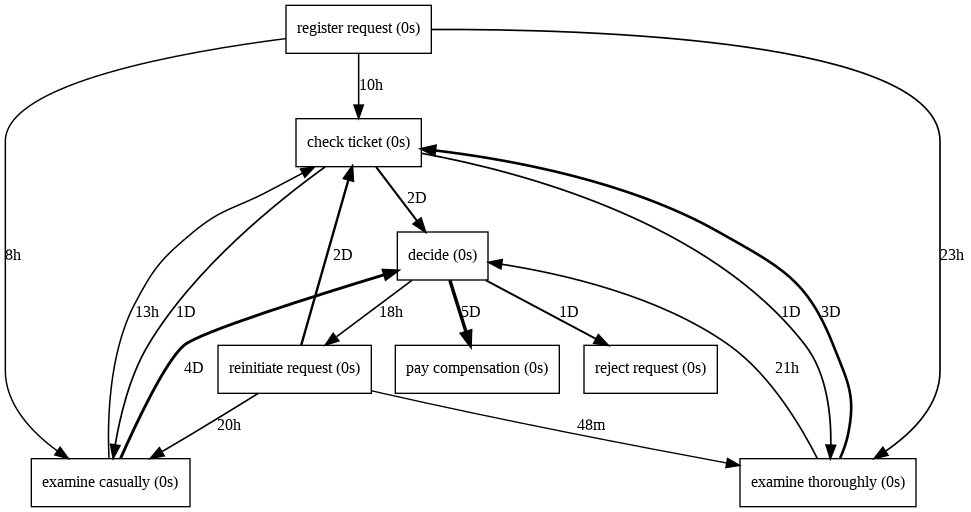

In [20]:
dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)

gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.PERFORMANCE)
dfg_visualization.view(gviz)

# Heuristic Miner

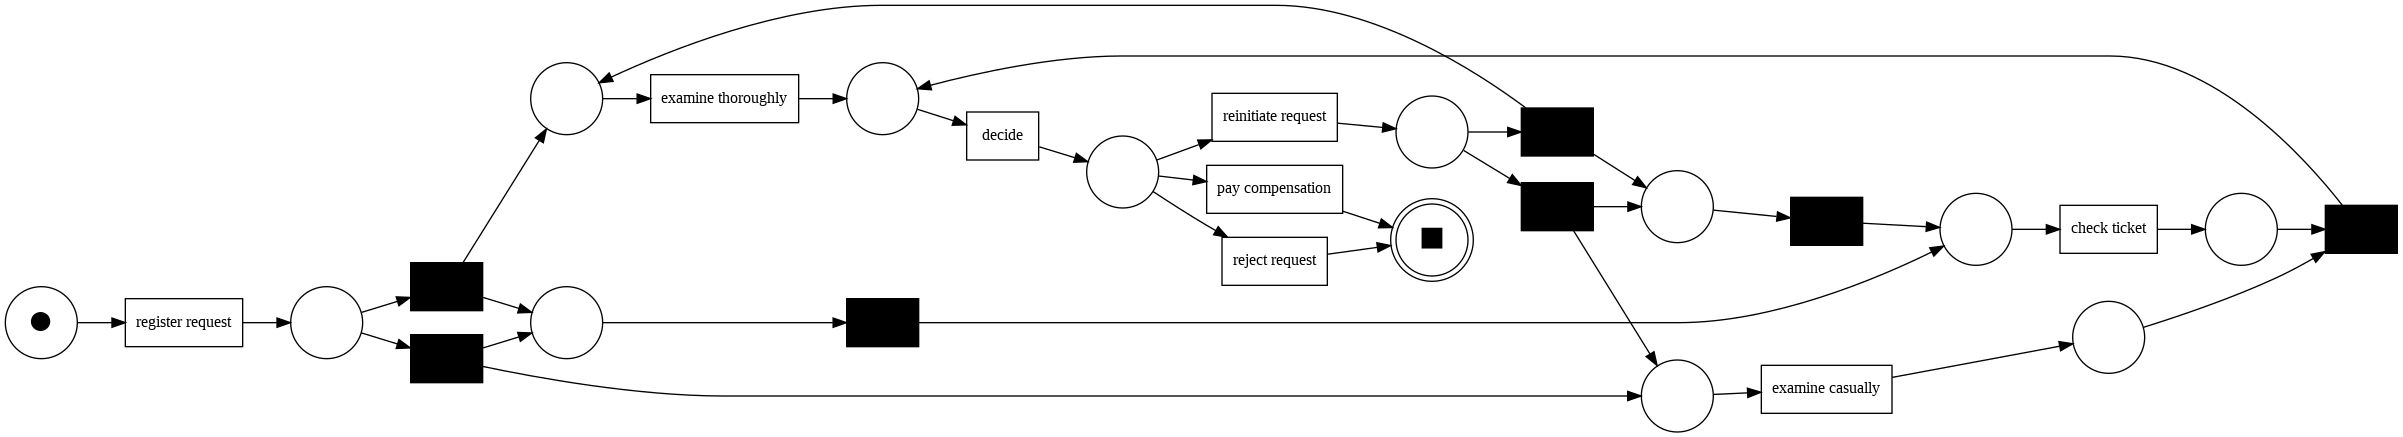

In [17]:
 # heuristics miner
net, im, fm = heuristics_miner.apply(log)

# viz
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

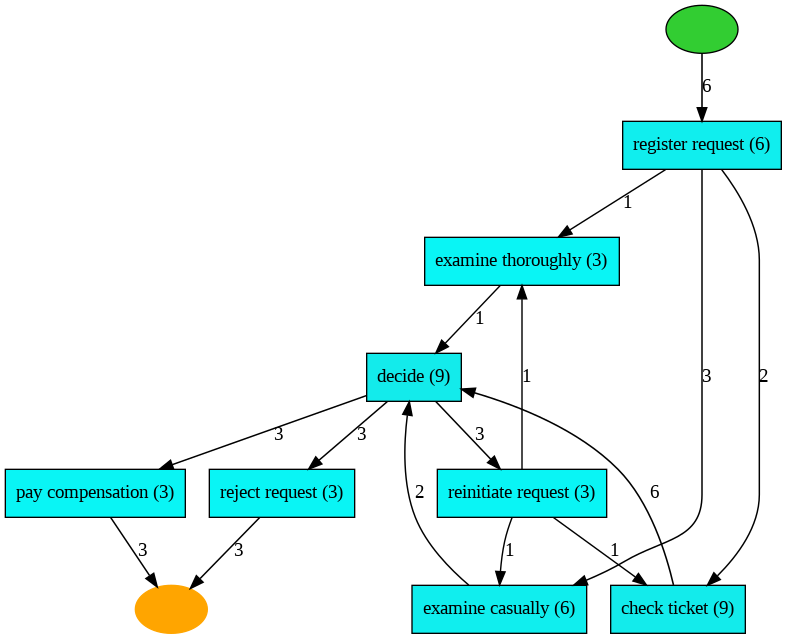

In [18]:
# heuristics miner
heu_net = heuristics_miner.apply_heu(log)

# viz
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)